<h4>The covid 19 dataset for Pakistani patients have been downloaded from Kaggle'</h4>

In [2]:
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
import pandas as pd 
covidpak = pd.read_csv('covid19_june_pak.csv')

<p>Lets explore the data first</p>

In [4]:
covidpak.head()

,Date,Cases,Deaths,Recovered,Travel_history,Province,City
0,2/26/2020,1,0,0,China,Islamabad Capital Territory,Islamabad
1,2/26/2020,2,0,0,Iran/Taftan,Sindh,Karachi
2,2/29/2020,1,0,0,China,Islamabad Capital Territory,Islamabad
3,2/29/2020,1,0,0,Iran/Taftan,Sindh,Karachi
4,3/2/2020,1,0,0,Iran/Taftan,Gilgit-Baltistan,Gilgit


In [5]:
covidpak.tail()

,Date,Cases,Deaths,Recovered,Travel_history,Province,City
2793,5/30/2020,952,36,394,NaN,Punjab,Lahore
2794,5/31/2020,1184,22,120,NaN,Punjab,Lahore
2795,6/1/2020,1610,43,95,NaN,Punjab,Lahore
2796,6/2/2020,1639,30,353,NaN,Punjab,Lahore
2797,6/3/2020,1615,37,243,NaN,Punjab,Lahore


In [6]:
covidpak.shape

(2798, 7)

In [7]:
covidpak.columns

Index(['Date', 'Cases', 'Deaths', 'Recovered', 'Travel_history', 'Province',
       'City'],
      dtype='object')

In [9]:
covidpak.dtypes

Date              object
Cases              int64
Deaths             int64
Recovered          int64
Travel_history    object
Province          object
City              object
dtype: object

In [10]:
covidpak.describe()

,Cases,Deaths,Recovered
count,2798.000000,2798.000000,2798.000000
mean,30.016440,0.617584,8.847034
std,128.861666,2.716284,61.362566
min,0.000000,0.000000,-2.000000
25%,0.000000,0.000000,0.000000
50%,2.000000,0.000000,0.000000
75%,9.000000,0.000000,1.000000
max,1639.000000,43.000000,1431.000000


<h4>Data Visualization</h4>

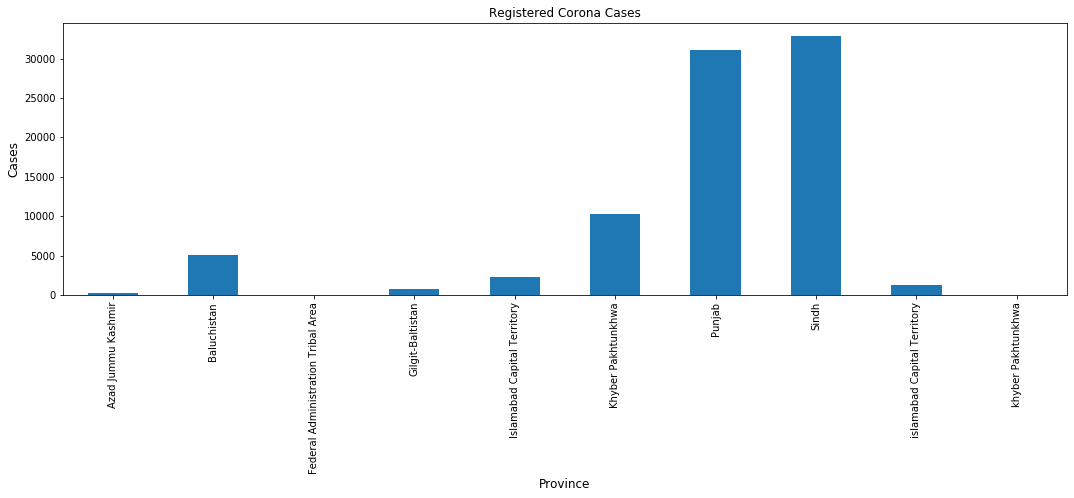

In [11]:
graph = covidpak.groupby('Province')['Cases'].sum().sort_index().plot(kind='bar',figsize=(18,5))
graph.set_xlabel('Province',fontsize=12)
graph.set_ylabel('Cases',fontsize=12)
graph.set_title('Registered Corona Cases',fontsize=12)
plt.show()

<h3>Here starts the data wrangling / preprocessing part which is the preliminary requirement for optimal data analysis</h3>
<p>Following steps are involved
<br>1. Finding missing values
<br>2. Changing data types of features, if require
<br>3. Encoding of data for categorical features</p>

In [12]:
covidpak.isnull().values.any()

True

In [14]:
covidpak.isnull().sum()

Date               0
Cases              0
Deaths             0
Recovered          0
Travel_history    36
Province           0
City               0
dtype: int64

In [15]:
col = ['Travel_history']

for c in col:
    mode = covidpak.Travel_history.mode()
    covidpak[c].fillna(mode)

In [16]:
#Lets remove the null values
covidpak.dropna(axis="rows", how="any", inplace = True)
covidpak.reset_index(drop=True, inplace=True)

In [17]:
covidpak['Province'].unique()

array(['Islamabad Capital Territory', 'Sindh', 'Gilgit-Baltistan',
       'Baluchistan', 'Punjab', 'Khyber Pakhtunkhwa',
       'khyber Pakhtunkhwa', 'Azad Jummu Kashmir',
       'Federal Administration Tribal Area',
       'islamabad Capital Territory'], dtype=object)

In [18]:
X = covidpak.select_dtypes(include=[object])
X

,Date,Travel_history,Province,City
0,2/26/2020,China,Islamabad Capital Territory,Islamabad
1,2/26/2020,Iran/Taftan,Sindh,Karachi
2,2/29/2020,China,Islamabad Capital Territory,Islamabad
3,2/29/2020,Iran/Taftan,Sindh,Karachi
4,3/2/2020,Iran/Taftan,Gilgit-Baltistan,Gilgit
...,...,...,...,...
2757,5/30/2020,Local - Social Contact,Azad Jummu Kashmir,Muzaffarabad
2758,5/31/2020,Local - Social Contact,Azad Jummu Kashmir,Muzaffarabad
2759,6/1/2020,Local - Social Contact,Azad Jummu Kashmir,Muzaffarabad
2760,6/2/2020,Local - Social Contact,Azad Jummu Kashmir,Muzaffarabad


In [19]:
X = X.drop(columns=['Date'])
X = X.drop(columns=['City'])
X

,Travel_history,Province
0,China,Islamabad Capital Territory
1,Iran/Taftan,Sindh
2,China,Islamabad Capital Territory
3,Iran/Taftan,Sindh
4,Iran/Taftan,Gilgit-Baltistan
...,...,...
2757,Local - Social Contact,Azad Jummu Kashmir
2758,Local - Social Contact,Azad Jummu Kashmir
2759,Local - Social Contact,Azad Jummu Kashmir
2760,Local - Social Contact,Azad Jummu Kashmir


In [20]:
X.dropna(axis="rows", how="any", inplace = True)

In [22]:
from sklearn.preprocessing import LabelEncoder

labelencod = LabelEncoder()

for col in covidpak.columns.values:

       if covidpak[col].dtypes=='object':
           data=covidpak[col].append(covidpak[col])
           labelencod.fit(data.values)
           covidpak[col]=labelencod.transform(covidpak[col])
       


In [23]:
covidpak

,Date,Cases,Deaths,Recovered,Travel_history,Province,City
0,0,1,0,0,1,4,40
1,0,2,0,0,5,7,46
2,1,1,0,0,1,4,40
3,1,1,0,0,5,7,46
4,11,1,0,0,5,3,29
...,...,...,...,...,...,...,...
2757,80,17,0,54,9,0,80
2758,81,4,0,9,9,0,80
2759,88,16,0,2,9,0,80
2760,89,13,1,0,9,0,80


In [26]:
#Confirming if any Null values are left
covidpak.isnull().values.any()

False

In [27]:
#Converting the types according to our domain
col = ['Deaths','Cases','Recovered']

for c in col:
    covidpak[c] = covidpak[c].astype(int)

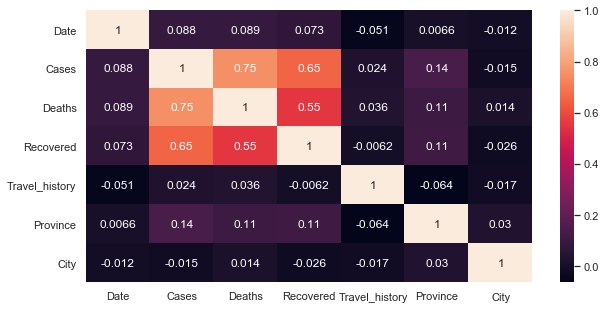

In [28]:
import seaborn as sns

corr = covidpak.corr()
sns.set(rc={'figure.figsize':(10,5)})
sns.heatmap(corr, annot=True)

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [30]:
scaler = StandardScaler()
covidpak_std = scaler.fit_transform(covidpak)

<H2>PCA</H2>

In [31]:
pca = PCA()
pca.fit(covidpak_std)

PCA()

In [32]:
pca.explained_variance_ratio_

array([0.3367324 , 0.15375548, 0.1458093 , 0.13820793, 0.12735196,
       0.06523249, 0.03291045])

Text(0, 0.5, 'Cumulative explained variance')

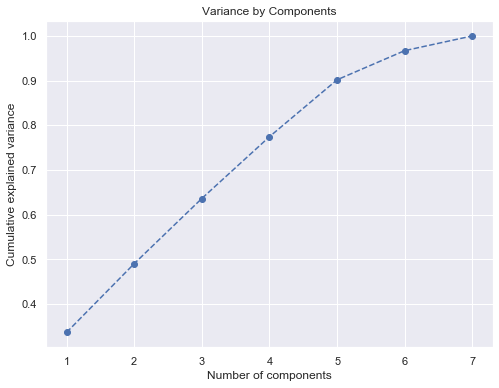

In [34]:
plt.figure(figsize = (8,6))
plt.plot(range(1,8), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Variance by Components')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')




It's advisable to preserve 80% of variance. So by looking at the graph, we decide to keep 3 components

In [35]:
pca = PCA(n_components = 4)

In [36]:
pca.fit(covidpak_std)

PCA(n_components=4)

In [37]:
pca.transform(covidpak_std)

array([[-0.7914221 , -2.9321014 , -0.19093408,  2.4681903 ],
       [-0.44886111, -1.89924715,  1.16655691,  2.78948826],
       [-0.7865803 , -2.94563633, -0.22088213,  2.44373399],
       ...,
       [-0.6057788 ,  1.08480469, -1.60417472, -2.72652764],
       [-0.36099666,  1.10292879, -1.61668969, -2.78048266],
       [-0.67420945,  1.05001847, -1.66708563, -2.77471231]])

In [56]:
scores_pca = pca.transform(covidpak_std)

<H5>K means clustering with PCA</H5>
<p>The PCA scores that we got in the above step will be incorporated into the K means algorithm
<br>In order to calculate the optimal number of clusters for K mean algorithm, we will undergo three steps.
    <br>1. We will run the algorithm for a number of clusters.
    <br>2. Then we will determine WCSS-Within sum-of-square values. We will choose the value of k for where wcss starts to diminish.
     <br>3. Through using Elbow method we will decide which k value is the best for our dataset.

In [39]:
wcss = []

#we will try for a range of 20 clusters 
for i in range(1,21):
    kmeans_pca = KMeans(n_clusters = i, init='k-means++', random_state = 42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

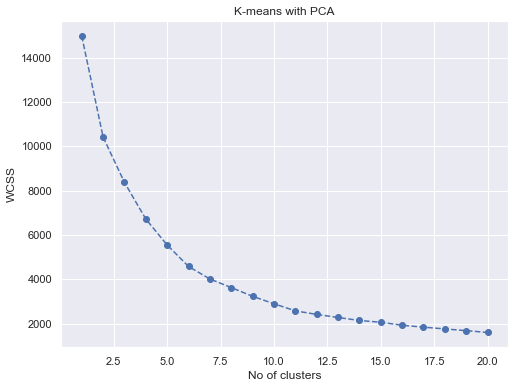

In [40]:
plt.figure(figsize = (8,6))
plt.plot(range (1,21), wcss, marker ='o', linestyle='--')
plt.title('K-means with PCA')
plt.xlabel('No of clusters')
plt.ylabel('WCSS')
plt.show()

<p>Now we will look for an elbow in the wcss graph to find out the optimal number of clusters. From the above graph we can see that the elbow is near point 8</p>

In [41]:
kmeans_pca = KMeans(n_clusters = 8, init = 'k-means++', random_state=42)

In [42]:
final = kmeans_pca.fit(scores_pca)

In [43]:
labels = final.predict(scores_pca)

In [44]:
kmeans_pca.inertia_

3631.486650726288

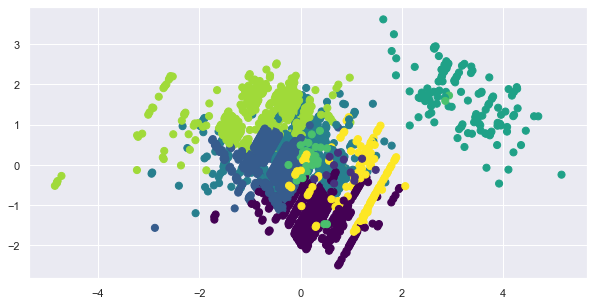

In [48]:
plt.scatter(scores_pca[:, 1], scores_pca[:, 2], c=labels,
            s=50, cmap='viridis');

In [49]:
kmeans_pca.fit(scores_pca)

KMeans(random_state=42)

<H3>K Mediods</H3>

In [50]:
from sklearn_extra.cluster import KMedoids

kmedoids = KMedoids(n_clusters = 2, random_state = 0).fit(scores_pca)


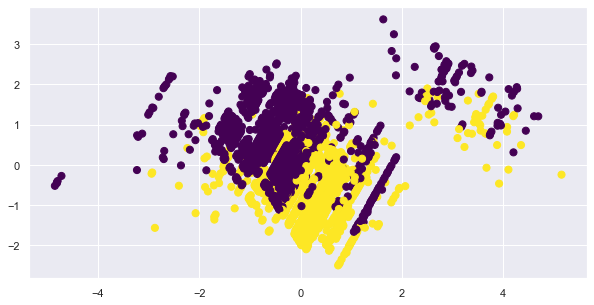

In [53]:
plt.scatter(scores_pca[:, 1], scores_pca[:, 2], c=kmedoids.labels_,
            s=50, cmap='viridis');